<a href="https://colab.research.google.com/github/20Engma/sehab-APP/blob/main/sehab3CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter
import os


In [75]:
## Defining batch specfications
batch_size = 75
img_height = 250
img_width = 250

In [76]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/good data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 258 files belonging to 2 classes.


In [78]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/good data/valid',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 88 files belonging to 2 classes.


In [79]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/good data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 37 files belonging to 2 classes.


In [83]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks

# تعريف النموذج باستخدام Keras
MyCnn = tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),  # إضافة Dropout لتقليل الـ Overfitting
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),  # إضافة Dropout أعلى قليلاً
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # إضافة Dropout كبير في الطبقات الكثيفة
    layers.Dense(len(class_names), activation='softmax')
])

# تكوين المُحسّن والخسارة والمقاييس
MyCnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# إضافة Early Stopping لمنع الـ Overfitting
early_stopping_monitor = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)



In [84]:
# تدريب النموذج
history = MyCnn.fit(
    training_ds,  # بيانات التدريب
    epochs=15,
    batch_size=32,
    validation_data=validation_ds,  # بيانات التحقق
    callbacks=[early_stopping_monitor],  # استخدام Early Stopping
    verbose=1
)


Epoch 1/15
4/4 [==============================] - 7s 1s/step - loss: 8.9349 - accuracy: 0.6124 - val_loss: 1.2934 - val_accuracy: 0.2614
Epoch 2/15
4/4 [==============================] - 1s 315ms/step - loss: 0.7522 - accuracy: 0.4922 - val_loss: 1.3728 - val_accuracy: 0.7386
Epoch 3/15
4/4 [==============================] - 1s 352ms/step - loss: 0.5839 - accuracy: 0.7171 - val_loss: 1.1050 - val_accuracy: 0.7386
Epoch 4/15
4/4 [==============================] - 1s 336ms/step - loss: 0.5474 - accuracy: 0.7171 - val_loss: 1.0821 - val_accuracy: 0.7386
Epoch 5/15
4/4 [==============================] - 1s 297ms/step - loss: 0.4911 - accuracy: 0.7171 - val_loss: 2.0423 - val_accuracy: 0.7386
Epoch 6/15
4/4 [==============================] - 1s 357ms/step - loss: 0.4792 - accuracy: 0.7636 - val_loss: 1.6136 - val_accuracy: 0.7500
Epoch 7/15
4/4 [==============================] - 1s 360ms/step - loss: 0.4457 - accuracy: 0.8101 - val_loss: 1.6259 - val_accuracy: 0.7727
Epoch 7: early stopping

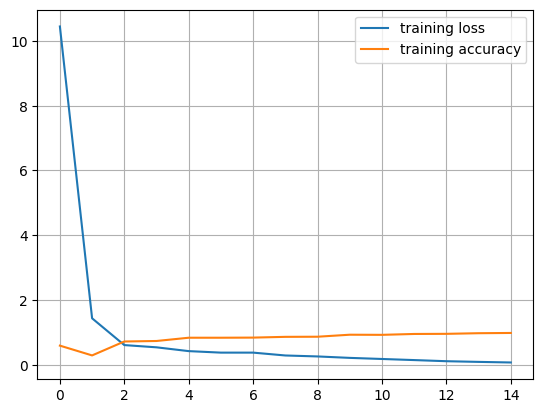

In [85]:
## stats on training data
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

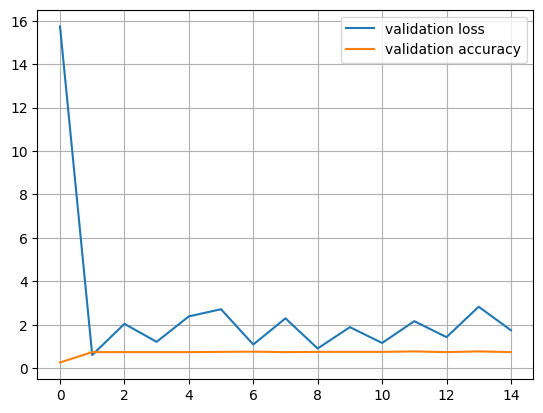

In [86]:
## stats on validation data
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

2/2 [==============================] - 0s 14ms/step


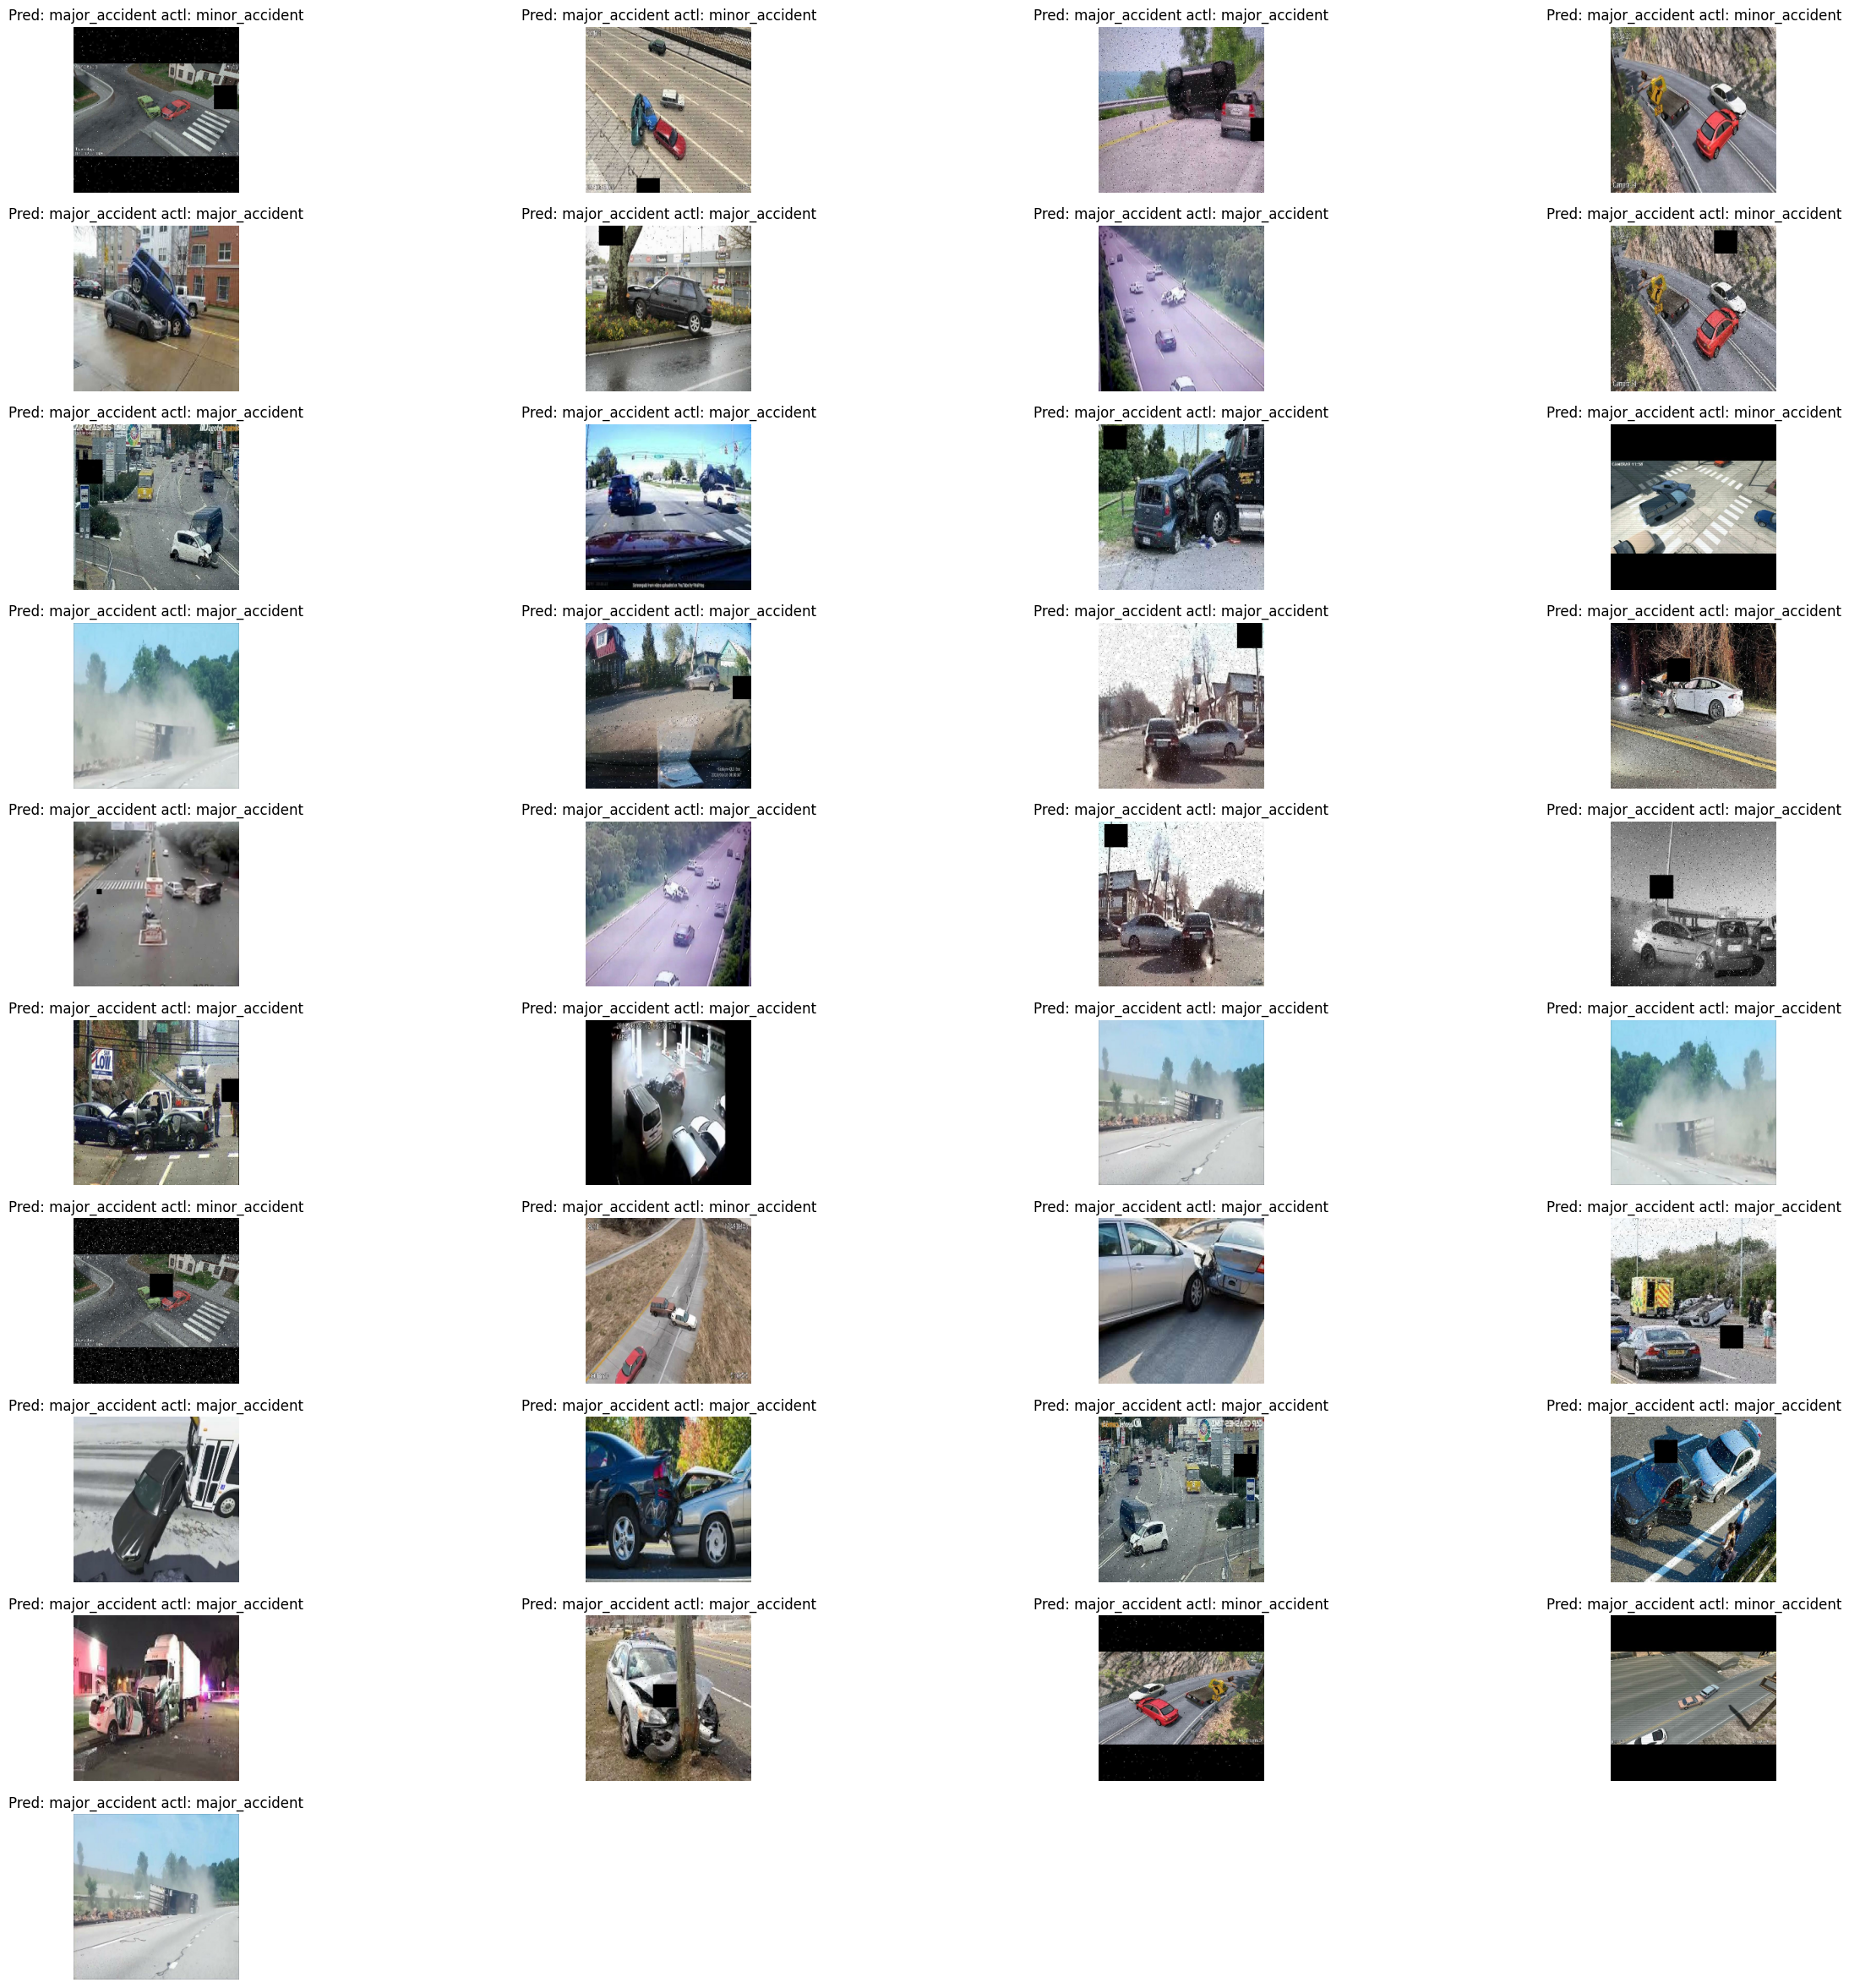

In [88]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    num_images = len(images)  # Dynamically get the number of images in the batch
    for i in range(num_images):  # Adjust loop to match the batch size
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl: ' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)


In [91]:
MyCnn.save('SEHAB.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:

!pip install tensorflow


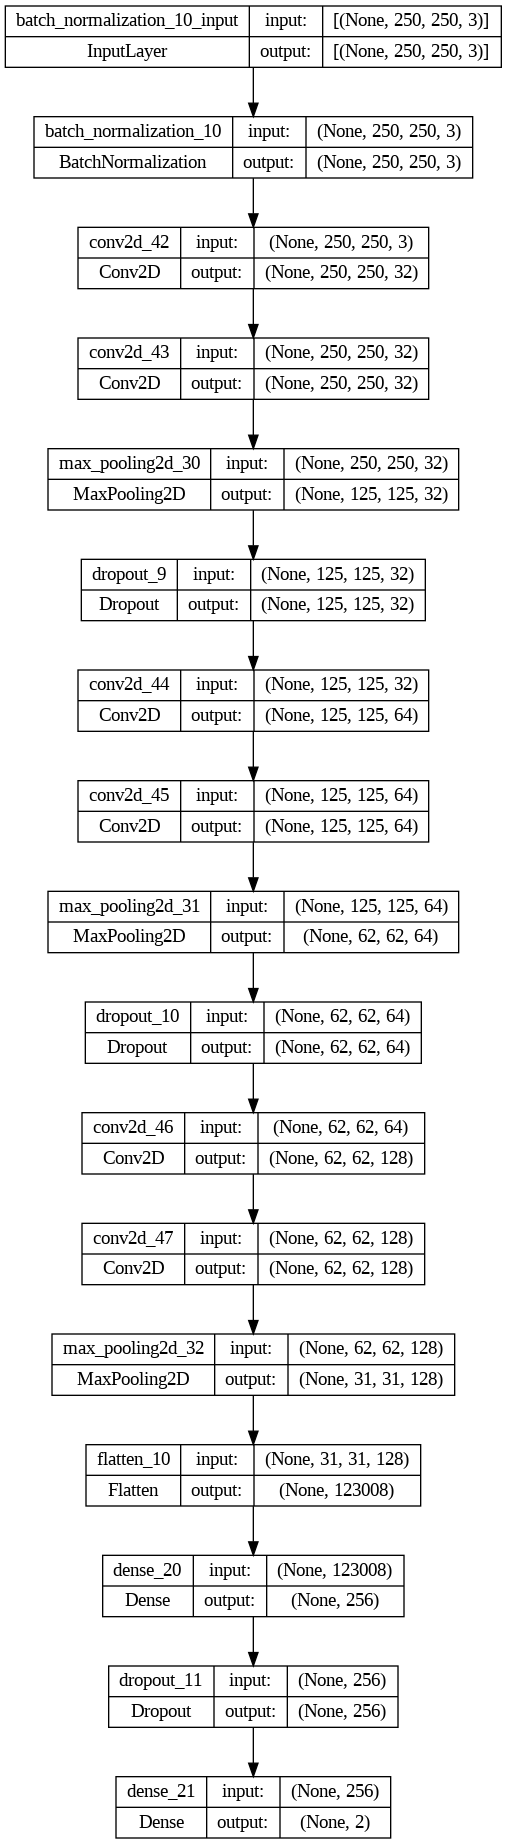

In [92]:
from tensorflow.keras.utils import plot_model


plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
